# Importing the dependencies

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Importing algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#Metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [35]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('Blood_cancer_data.csv')

In [38]:
df

,samples,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V3563,V3564,V3565,V3566,V3567,V3568,V3569,V3570,V3571,Result
0,1,-0.788350,-0.756913,-1.414095,-0.718028,0.473398,3.113805,2.749407,2.628862,3.146849,...,-0.660664,-0.277515,-0.190609,1.096830,0.069212,-0.178846,0.468823,-0.331179,-0.825661,0
1,2,-1.335163,-1.335163,-1.335163,-1.205542,-0.055226,0.251215,-1.213103,1.040300,3.097184,...,-0.756412,-0.670722,-0.603962,0.263903,0.520380,-0.037259,0.461020,-0.390380,-1.335163,0
2,3,-1.423499,-1.423499,-1.389461,-0.069438,0.911507,2.080529,1.603549,1.702697,2.980989,...,-0.487601,-0.091597,0.289707,0.328599,0.732303,-0.973264,0.686988,0.355827,-0.708238,0
3,4,-0.941616,-1.362703,-1.362703,-0.959263,-0.052647,2.210509,1.520901,1.625528,3.244964,...,-1.135454,-0.230745,-0.330132,0.483504,0.590966,-0.852819,0.327239,-0.874228,-1.149951,0
4,5,-1.373415,-0.527130,-1.373415,-1.191340,0.068572,0.963808,1.654828,-0.319909,3.193077,...,-1.373415,-0.948803,-0.845447,0.306028,0.339066,0.107542,-0.534426,-0.325722,-1.373415,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,-1.069315,0.490642,-1.362381,-0.837656,0.290049,-1.362381,-1.362381,-1.362381,2.966510,...,-0.709472,-0.745946,-1.106406,0.673558,0.076040,0.663305,0.050385,-0.584246,-1.362381,0
68,69,-1.422469,-1.422469,0.157955,0.121096,0.957790,-1.422469,-1.422469,-1.422469,3.025302,...,-0.937056,-0.486363,-0.615953,0.745703,0.172275,0.329213,0.333950,-0.677415,-1.346944,0
69,70,-1.041304,0.066865,-1.041304,-0.680756,-0.040154,3.177571,2.530065,2.983361,3.502013,...,-1.041304,-1.041304,-0.581682,1.154342,0.060892,-0.203257,0.066865,-0.513601,-0.502712,0
70,71,-1.210655,-0.834006,-1.210655,-0.920232,0.409746,-1.210655,-1.210655,-1.210655,2.707367,...,-0.720648,-0.428079,-0.614412,1.349644,0.704953,-0.551259,-0.032819,-0.518925,-1.210655,0


In [39]:
df.head()

,samples,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V3563,V3564,V3565,V3566,V3567,V3568,V3569,V3570,V3571,Result
0,1,-0.788350,-0.756913,-1.414095,-0.718028,0.473398,3.113805,2.749407,2.628862,3.146849,...,-0.660664,-0.277515,-0.190609,1.096830,0.069212,-0.178846,0.468823,-0.331179,-0.825661,0
1,2,-1.335163,-1.335163,-1.335163,-1.205542,-0.055226,0.251215,-1.213103,1.040300,3.097184,...,-0.756412,-0.670722,-0.603962,0.263903,0.520380,-0.037259,0.461020,-0.390380,-1.335163,0
2,3,-1.423499,-1.423499,-1.389461,-0.069438,0.911507,2.080529,1.603549,1.702697,2.980989,...,-0.487601,-0.091597,0.289707,0.328599,0.732303,-0.973264,0.686988,0.355827,-0.708238,0
3,4,-0.941616,-1.362703,-1.362703,-0.959263,-0.052647,2.210509,1.520901,1.625528,3.244964,...,-1.135454,-0.230745,-0.330132,0.483504,0.590966,-0.852819,0.327239,-0.874228,-1.149951,0
4,5,-1.373415,-0.527130,-1.373415,-1.191340,0.068572,0.963808,1.654828,-0.319909,3.193077,...,-1.373415,-0.948803,-0.845447,0.306028,0.339066,0.107542,-0.534426,-0.325722,-1.373415,0


In [40]:
df.shape

(72, 3573)

In [41]:
df=df.drop(['samples'],axis=1)

In [42]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V3563,V3564,V3565,V3566,V3567,V3568,V3569,V3570,V3571,Result
0,-0.788350,-0.756913,-1.414095,-0.718028,0.473398,3.113805,2.749407,2.628862,3.146849,2.870575,...,-0.660664,-0.277515,-0.190609,1.096830,0.069212,-0.178846,0.468823,-0.331179,-0.825661,0
1,-1.335163,-1.335163,-1.335163,-1.205542,-0.055226,0.251215,-1.213103,1.040300,3.097184,2.953193,...,-0.756412,-0.670722,-0.603962,0.263903,0.520380,-0.037259,0.461020,-0.390380,-1.335163,0
2,-1.423499,-1.423499,-1.389461,-0.069438,0.911507,2.080529,1.603549,1.702697,2.980989,2.980989,...,-0.487601,-0.091597,0.289707,0.328599,0.732303,-0.973264,0.686988,0.355827,-0.708238,0
3,-0.941616,-1.362703,-1.362703,-0.959263,-0.052647,2.210509,1.520901,1.625528,3.244964,3.000395,...,-1.135454,-0.230745,-0.330132,0.483504,0.590966,-0.852819,0.327239,-0.874228,-1.149951,0
4,-1.373415,-0.527130,-1.373415,-1.191340,0.068572,0.963808,1.654828,-0.319909,3.193077,3.216337,...,-1.373415,-0.948803,-0.845447,0.306028,0.339066,0.107542,-0.534426,-0.325722,-1.373415,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-1.069315,0.490642,-1.362381,-0.837656,0.290049,-1.362381,-1.362381,-1.362381,2.966510,2.944970,...,-0.709472,-0.745946,-1.106406,0.673558,0.076040,0.663305,0.050385,-0.584246,-1.362381,0
68,-1.422469,-1.422469,0.157955,0.121096,0.957790,-1.422469,-1.422469,-1.422469,3.025302,2.900987,...,-0.937056,-0.486363,-0.615953,0.745703,0.172275,0.329213,0.333950,-0.677415,-1.346944,0
69,-1.041304,0.066865,-1.041304,-0.680756,-0.040154,3.177571,2.530065,2.983361,3.502013,3.596949,...,-1.041304,-1.041304,-0.581682,1.154342,0.060892,-0.203257,0.066865,-0.513601,-0.502712,0
70,-1.210655,-0.834006,-1.210655,-0.920232,0.409746,-1.210655,-1.210655,-1.210655,2.707367,2.641424,...,-0.720648,-0.428079,-0.614412,1.349644,0.704953,-0.551259,-0.032819,-0.518925,-1.210655,0


In [43]:
# checking the number of missing values in each column
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
         ..
V3568     0
V3569     0
V3570     0
V3571     0
Result    0
Length: 3572, dtype: int64

In [44]:
# statistical measures of the data
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V3563,V3564,V3565,V3566,V3567,V3568,V3569,V3570,V3571,Result
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,-1.047542,-0.866620,-1.120748,-0.874508,0.207720,0.251029,-0.108137,-0.051738,3.086844,3.055351,...,-0.704970,-0.503433,-0.379371,0.553529,0.348974,-0.266736,0.432115,-0.393840,-0.383634,0.347222
std,0.461566,0.513693,0.460815,0.450789,0.487028,1.664178,1.539846,1.488479,0.547118,0.640202,...,0.350060,0.368637,0.425617,0.632455,0.416034,0.585303,0.532052,0.484756,0.828590,0.479428
min,-1.510219,-1.443619,-1.534413,-1.481628,-0.850903,-1.534413,-1.534413,-1.534413,-0.471762,-1.045769,...,-1.373415,-1.280632,-1.254586,-0.845337,-1.196633,-1.270906,-1.254586,-1.339686,-1.373415,0.000000
25%,-1.329244,-1.273358,-1.335916,-1.192663,-0.072993,-1.230488,-1.248434,-1.246331,2.932794,2.836594,...,-0.992777,-0.751990,-0.734502,0.177118,0.094475,-0.659426,0.162754,-0.719525,-0.979793,0.000000
50%,-1.212520,-1.060243,-1.220637,-1.006300,0.195243,-0.118139,-1.085631,-1.018315,3.135008,3.112185,...,-0.712786,-0.483827,-0.390479,0.472531,0.391142,-0.237690,0.489916,-0.375618,-0.578937,0.000000
75%,-1.044653,-0.547735,-1.092223,-0.683954,0.421015,1.712721,1.198054,1.233102,3.353351,3.436648,...,-0.430340,-0.250308,-0.112348,1.042319,0.592806,0.021009,0.733215,-0.028566,-0.135401,1.000000
max,0.391399,0.490642,1.113546,0.991423,1.700528,3.655194,3.655194,3.334310,3.963164,4.009332,...,0.054434,0.376936,0.577272,2.239308,1.106560,1.716995,1.267172,0.603635,1.915622,1.000000


In [45]:
# distribution of malignant and benign
# malignant -> 1
# benign -> 0
df['Result'].value_counts()

0    47
1    25
Name: Result, dtype: int64

<Axes: xlabel='Result', ylabel='count'>

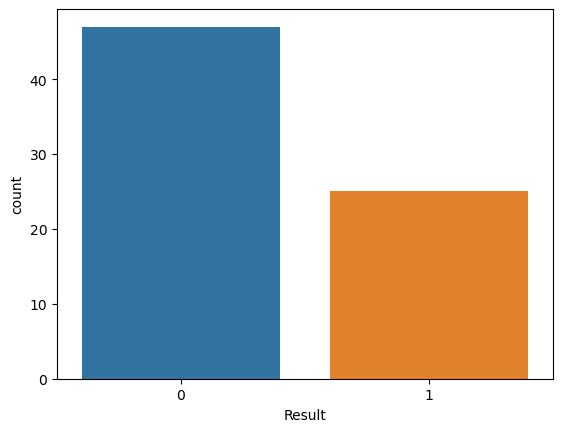

In [46]:
sns.countplot(x = 'Result', data = df, order = df['Result'].value_counts().index)

## Splitting the data into features and labels

In [47]:
X = df.drop(columns = 'Result' , axis = 1)
Y = df['Result']

In [49]:
X #features

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V3562,V3563,V3564,V3565,V3566,V3567,V3568,V3569,V3570,V3571
0,-0.788350,-0.756913,-1.414095,-0.718028,0.473398,3.113805,2.749407,2.628862,3.146849,2.870575,...,-0.285366,-0.660664,-0.277515,-0.190609,1.096830,0.069212,-0.178846,0.468823,-0.331179,-0.825661
1,-1.335163,-1.335163,-1.335163,-1.205542,-0.055226,0.251215,-1.213103,1.040300,3.097184,2.953193,...,-0.405310,-0.756412,-0.670722,-0.603962,0.263903,0.520380,-0.037259,0.461020,-0.390380,-1.335163
2,-1.423499,-1.423499,-1.389461,-0.069438,0.911507,2.080529,1.603549,1.702697,2.980989,2.980989,...,-0.739236,-0.487601,-0.091597,0.289707,0.328599,0.732303,-0.973264,0.686988,0.355827,-0.708238
3,-0.941616,-1.362703,-1.362703,-0.959263,-0.052647,2.210509,1.520901,1.625528,3.244964,3.000395,...,-0.019961,-1.135454,-0.230745,-0.330132,0.483504,0.590966,-0.852819,0.327239,-0.874228,-1.149951
4,-1.373415,-0.527130,-1.373415,-1.191340,0.068572,0.963808,1.654828,-0.319909,3.193077,3.216337,...,-0.948803,-1.373415,-0.948803,-0.845447,0.306028,0.339066,0.107542,-0.534426,-0.325722,-1.373415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-1.069315,0.490642,-1.362381,-0.837656,0.290049,-1.362381,-1.362381,-1.362381,2.966510,2.944970,...,-0.745946,-0.709472,-0.745946,-1.106406,0.673558,0.076040,0.663305,0.050385,-0.584246,-1.362381
68,-1.422469,-1.422469,0.157955,0.121096,0.957790,-1.422469,-1.422469,-1.422469,3.025302,2.900987,...,-0.647954,-0.937056,-0.486363,-0.615953,0.745703,0.172275,0.329213,0.333950,-0.677415,-1.346944
69,-1.041304,0.066865,-1.041304,-0.680756,-0.040154,3.177571,2.530065,2.983361,3.502013,3.596949,...,-0.149459,-1.041304,-1.041304,-0.581682,1.154342,0.060892,-0.203257,0.066865,-0.513601,-0.502712
70,-1.210655,-0.834006,-1.210655,-0.920232,0.409746,-1.210655,-1.210655,-1.210655,2.707367,2.641424,...,-0.132937,-0.720648,-0.428079,-0.614412,1.349644,0.704953,-0.551259,-0.032819,-0.518925,-1.210655


In [51]:
print(Y) #targets

0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    0
69    0
70    0
71    0
Name: Result, Length: 72, dtype: int64


## Split the data into Training data and Testing data 

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(72, 3571) (57, 3571) (15, 3571)


In [54]:
model_accuracies = {}

## Standard scaling

In [56]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)#Scaling X_train
X_test=sc.fit_transform(X_test)#Scaling X_test

# Model Training

## Logistic Regression

In [60]:
lr=LogisticRegression(random_state=0)
lr.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [61]:
print("Logistic regression:",lr.score(X_train,Y_train))

Logistic regression: 1.0


In [62]:
print("\nModel: Logistic Regression")
print("Classification Report")
print(classification_report(Y_test,lr.predict(X_test)))
print("Accuracy Score:",accuracy_score(Y_test,lr.predict(X_test)))
model_accuracies['Logistic Regression'] = accuracy_score(Y_test,lr.predict(X_test))


Model: Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.95      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15

Accuracy Score: 0.9333333333333333


## Decision Tree Classifier

In [63]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [64]:
print("Decision Tree:",dt.score(X_train,Y_train))

Decision Tree: 1.0


In [65]:
print("\nModel: Decision tree")
print("Classification Report")
print(classification_report(Y_test,dt.predict(X_test)))
print("Accuracy Score:",accuracy_score(Y_test,dt.predict(X_test)))
model_accuracies['Decision Tree Classifier'] = accuracy_score(Y_test,dt.predict(X_test))


Model: Decision tree
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15

Accuracy Score: 0.8666666666666667


## Random Forest Classifier

In [66]:
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [67]:
print("Random Forest:",rfc.score(X_train,Y_train))

Random Forest: 1.0


In [69]:
print("\nModel: Random forest")
print("Classification Report")
print(classification_report(Y_test,rfc.predict(X_test)))
print("Accuracy Score:",accuracy_score(Y_test,rfc.predict(X_test)))
model_accuracies['Random Forests Classifier'] = accuracy_score(Y_test,rfc.predict(X_test))


Model: Random forest
Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.95      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15

Accuracy Score: 0.9333333333333333


## Gaussian Naive Bayes Classifier

In [71]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [72]:
print("GaussianNB:",gnb.score(X_train,Y_train))

GaussianNB: 1.0


In [73]:
print("\nModel: GaussianNB")
print("Classification Report")
print(classification_report(Y_test,gnb.predict(X_test)))
print("Accuracy Score:",accuracy_score(Y_test,gnb.predict(X_test)))
model_accuracies['GNB'] = accuracy_score(Y_test,gnb.predict(X_test))


Model: GaussianNB
Classification Report
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.67      0.80         6

    accuracy                           0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15

Accuracy Score: 0.8666666666666667


In [74]:
print("Performance of ML Algorithms:")
print('Logistic Regression:', str(np.round(model_accuracies['Logistic Regression']*100,2)) + ' %')
print('Decision Tree Classifier:', str(np.round(model_accuracies['Decision Tree Classifier']*100,2)) + ' %')
print('Random Forests Classifier:', str(np.round(model_accuracies['Random Forests Classifier']*100,2)) + ' %')
print('Gaussian Naive Bayes:', str(np.round(model_accuracies['GNB']*100,2)) + ' %')

Performance of ML Algorithms:
Logistic Regression: 93.33 %
Decision Tree Classifier: 86.67 %
Random Forests Classifier: 93.33 %
Gaussian Naive Bayes: 86.67 %
